<a href="https://colab.research.google.com/github/prysykes/A-random-serial-number-generator/blob/main/deepfool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#!pip install -Uqq ipdb
# import ipdb

In [2]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh, topdown=False):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)

  os.rmdir('/content/MNISTClassifier')

In [43]:
%pdb off

Automatic pdb calling has been turned OFF


In [3]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28, 28)).astype("float32") / 255
images = np.expand_dims(images, axis=3)
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
test_images = np.expand_dims(test_images, axis=3)
x_train, x_test = images[10000:], images[:10000]
y_train, y_test = labels[10000:], labels[:10000]

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train))
x_train, x_val = x_train[10000:], x_train[0:10000]
y_train, y_val = y_train[10000:], y_train[0:10000]
print(len(x_train))

50000
40000


2


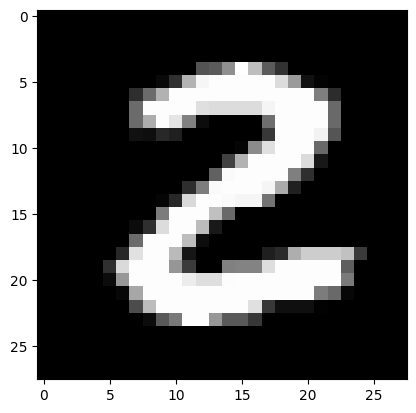

In [5]:
x_test[5].shape
digit = x_test[25]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[16])

# number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

In [6]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)

[(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]


In [7]:
class MNISTClassifierSmall(tf.keras.Model):
  def __init__(self):
    super(MNISTClassifierSmall, self).__init__()

    #define layers
    self.conv1 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv3 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(10)

    self.layers_list = [self.conv1, self.conv2, self.conv3, self.flatten, self.dense1]

  @tf.function
  def call(self, *args, **kwargs):
    activation_list = []
    out = args[0]
    for layer in self.layers_list:
      out = layer(out)
      activation_list.append(out)

    if kwargs['training']:
      return out

    else:
      prob = tf.nn.softmax(out)
      return out, prob


In [8]:
model = MNISTClassifierSmall()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifierSmall')
# model = keras.models.load_model("MNISTClassifier.keras")

Epoch 1/10
1250/1250 [==============================] - 18s 5ms/step - loss: 0.1401 - accuracy: 0.9585 - val_loss: 0.0890 - val_accuracy: 0.9747
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0595 - val_accuracy: 0.9832
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0685 - val_accuracy: 0.9802
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0769 - val_accuracy: 0.9817
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0785 - val_accuracy: 0.9822
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0730 - val_accuracy: 0.9829
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0724 - val_accuracy

In [ ]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

In [ ]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifier')
# model = keras.models.load_model("MNISTClassifier.keras")

## Load model and make predictions

In [9]:
# select a few twos from the test dataset and reshape
# twos are at [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

twos_tuple = [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]
reshaped_sample_twos = []
for tup in twos_tuple:
  a_two = x_test[tup[0]]
  a_two = np.reshape(a_two, (-1, 28, 28, 1))
  reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)
# a_five = np.reshape(x_test[47], (-1, 28, 28, 1))
# print(a_five.shape)

In [10]:
print(reshaped_sample_twos.shape) #the network expects a rank 4 tensor ie. batch, width, hieght, channel

(10, 1, 28, 28, 1)


In [11]:
# location of 2 in x_test # number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]
model = tf.keras.models.load_model('MNISTClassifierSmall')

prediction = []
for sample in reshaped_sample_twos:
  sample_prediction = model.predict(sample)
  prediction.append(sample_prediction)
# print(np.argmax(prediction))
print(np.argmax(prediction[0][1]))

1/1 [==============================] - 0s 19ms/step
2


In [12]:
reshaped_sample_twos[0].shape
print("hh", reshaped_sample_twos[0].shape)
#squeze to drop first dim
squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[5]
y = tf.convert_to_tensor(y)

print(y)
print(x.shape)

hh (1, 28, 28, 1)
tf.Tensor(2, shape=(), dtype=uint8)
(1, 28, 28, 1)


In [ ]:
class_arr = [tf.convert_to_tensor(y_test[tup[0]]) for tup in twos_tuple]

print(class_arr)

In [74]:
def deepfool_attack(model, image, num_classes, overshoot, max_iter):
  # image_tensor = np.expand_dims(image, axis=0) #tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)
  image_tensor = tf.convert_to_tensor(image)

  print(type(image_tensor))
  original_pred = model.predict(image_tensor)
  current_class = np.argmax(original_pred)
  # print("original_pred: ", original_pred)
  # print("current_class: ", current_class)

  f_image = model(image)[0]
  label = np.argmax(f_image)
  # print("f_image", f_image)
  # print("label: ", label)
  # w = np.zeros(image_tensor.shape)
  w = tf.zeros(image_tensor.shape, dtype= tf.float32)
  r_tot = tf.zeros(image_tensor.shape, dtype= tf.float32)
  # print("w shape: ", w.shape)
  # print("r_tot shape: ", r_tot.shape)
  for i in range(max_iter):



    with tf.GradientTape() as tape:
      tape.watch(image_tensor)
      pert_image = image_tensor + r_tot

      f_pert_image = model(pert_image)[0]

      label_pert_image = np.argmax(f_pert_image)
      pert = tf.math.abs(f_pert_image - f_image)
      print("yes")
      distance = f_pert_image - f_image
      print("distance", distance)
      print("distance shape", distance.shape)
      gradients = tape.gradient(tf.convert_to_tensor(distance), pert_image)
      # print("gradient ", gradients)

    # if i % 100 == 0:
    #   print(f"step: {i} \n Current Class: {current_class} \n Pert Class {label_pert_image}")
    if label_pert_image != current_class:
      return pert_image, r_tot
    # gradients = tf.gradients(label_pert_image -label, pert_image)

    accumulated_w = np.zeros_like(w)
    print(accumulated_w)
    # print("shape")
    # print(accumulated_w.shape)
    for j in range(num_classes):
      w_j = gradients[0][j] - gradients[0][current_class]
      accumulated_w[j] = w_j.numpy()
      # w[j] = w_j.numpy()

    norm_w = np.linalg.norm(accumulated_w)

    r_i = (tf.math.abs(pert) / norm_w) * accumulated_w
    r_tot = r_tot + r_i

  return None, max_iter


In [30]:
def deepfool_attack(model, image, num_classes, overshoot, max_iter):
  # image_tensor = np.expand_dims(image, axis=0) #tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)
  image_tensor = image
  orig_label = np.argmax(model(image_tensor)[0])
  # print("orig_class", orig_class)
  input_tensor = tf.cast(image_tensor, dtype=tf.float32)

  with tf.GradientTape() as tape:
    tape.watch(input_tensor)
    output = model(input_tensor)
    output = output[0] #output has the logits
    # print("class", np.argmax(output[0]))
    # print("output", output)
    # print("output shape", output.shape)
    # print("output shape", output.flatten().shape)

    # print("output", output)

  f_image = tf.reshape(output, (10,1))
  # print("f_image", f_image)
  # print("f_image", f_image.shape)
  num_classes = f_image.shape[0]
  # print("num classes", num_classes)
  grads = tape.gradient(output, input_tensor)
  grads = tf.squeeze(grads, axis=0)

  # print("grads", grads.shape)

  adv_image = np.copy(image)
  adv_label = np.argmax(output)
  # print("label", adv_label)


  # for i in range(max_iter):
  #   print(f"step{i}")
  #   gradients = np.inf
  #   current_label = np.argmax(model(adv_image)[0])
  #   print("current label", current_label)
  step = 1
  gradients = np.inf
  while step < max_iter:
    for k in range(1, num_classes):
      # w_k = tape.gradient(output, input_tensor)
      # w_k = grads[k] - grads[0]
      # print(f"grad_{k}", grads[k])
      # f_k = f_image[k] - f_image[0]
      w_k = grads - grads[k]
      # print(f"grad_{k}", grads[k])
      f_k = f_image[k] - f_image[orig_label]
      # print("shape fk", f_k.shape)
      distance_k = abs(f_k) / np.linalg.norm(w_k)

      if distance_k < gradients:
        gradients = distance_k
        # perturbation = (overshoot * w_k) / np.linalg.norm(w_k)
        perturbation = distance_k*w_k
        # print("perturbation", perturbation)

    adv_image += perturbation
    # print("perturbation shape", perturbation.shape)

    adv_label = np.argmax(model(adv_image)[0])

    if step%100 == 0:
      print(f"Num_iterations: {step} \n Y_Pred: {adv_label} \n Y: {orig_label}")
    if adv_label != orig_label:
      adv_image = tf.clip_by_value(adv_image, 0, 1)
      break
    step +=1

    # return adv_image, perturbation
  return adv_image, perturbation

## Batch Operations

### Batch Attack

In [13]:
def batch_predict(model, results_arr, original_img_arr):
  predictions = {"original": [],
                 "adversarial": []}
  for element in zip(results_arr, original_img_arr):
    orig_current_pred = model.predict(element[1])
    adv_current_pred = model.predict(element[0][0])
    orig_current_pred = np.argmax(orig_current_pred[1])
    adv_current_pred = np.argmax(adv_current_pred[1])

    predictions['original'].append(orig_current_pred)
    predictions['adversarial'].append(adv_current_pred)

  print("predictions", predictions)
  return predictions

In [14]:
def run_attacks(model, img_arr,  num_classes, overshoot, max_iter, att_func):
  result = []
  # result contains a tupple of AE and Pertubation

  for image in img_arr:
    x_test_adv, perturbation = att_func(model, image, num_classes, overshoot, max_iter)
    result.append((x_test_adv, perturbation))

  return result

In [126]:
num_classes, overshoot, max_iter = 10, 0.02, 2000

In [127]:
def deepfool_attack(model, image, num_classes, overshoot, max_iter):
  x_adv = image.copy()
  x_tensor = tf.convert_to_tensor(x_adv, dtype=tf.float32)
  # lolo = model(image)[0]
  # lolo = lolo[0]
  # print("lolo", lolo[1])
  original_label = np.argmax(model(image)[0])
  perturbation = np.zeros_like(x_adv)

  for step in range(max_iter):
    x_tensor = tf.convert_to_tensor(x_adv, dtype=tf.float32)

    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      logits = model(x_tensor)[0]
      current_label = np.argmax(logits)
      loss = tf.reduce_sum(logits - logits[0][original_label])


    gradient = tape.gradient(loss, x_tensor)
    w = gradient - gradient[:, original_label]

    min_dist = np.inf
    min_idx = None

    for k in range(num_classes):
      if k == original_label:
        continue
      w_k = model.get_layer(index=-1).weights[0][original_label] - model.get_layer(index=-1).weights[0][k]
      f_k = logits[0][k] - logits[0][original_label]
      dist = abs(f_k) / np.linalg.norm(w_k)

      if dist < min_dist:
        min_dist = dist
        min_idx = k

    perturbation += (min_dist * overshoot) * (w/np.linalg.norm(w))
    perturbation = tf.clip_by_value(perturbation, 0, 1)
    x_adv = x + perturbation
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    if step % 100 == 0:
      print(f"Step: {step} \n Current Label: {current_label} \n Original Label: {original_label}")
    if current_label != original_label:
      break

  return x_adv, perturbation



In [128]:
results = run_attacks(model, reshaped_sample_twos, num_classes, overshoot, max_iter, deepfool_attack)

Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2
Step: 0 
 Current Label: 2 
 Original Label: 2


In [129]:
batch_predictions = batch_predict(model, results, reshaped_sample_twos)

1/1 [==============================] - 0s 26ms/step
predictions {'original': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'adversarial': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]}


In [122]:
adv_pred = model.predict(results[0][0])
org_pred = model.predict(reshaped_sample_twos[0])

print("ori", np.argmax(org_pred[1]))
print("adv", np.argmax(adv_pred[1]))

1/1 [==============================] - 0s 19ms/step
ori 2
adv 8


## Prepare batch

In [87]:
def prepare_for_plt(results_arr, org_img_arr):
  print(len(results_arr), len(org_img_arr))
  new_results_arr = []
  new_org_img_arr = []
  print(f"Image: {results[0][0].shape} \n Perturbation: {results[0][1].shape} \n Original: {reshaped_sample_twos[0].shape}")
  for tup in results_arr:
    reshaped_adv_img = np.squeeze(tup[0])
    reshaped_adv_img = np.expand_dims(reshaped_adv_img, axis=2)

    reshaped_perturb = np.squeeze(tup[1])
    reshaped_perturb = np.expand_dims(reshaped_perturb, axis=2)
    new_results_arr.append((reshaped_adv_img, reshaped_perturb))
  for img in org_img_arr:
    reshaped_img = np.squeeze(img)
    reshaped_img = np.expand_dims(reshaped_img, axis=2)
    new_org_img_arr.append(reshaped_img)

  print(f"ADV Image: { new_results_arr[0][0].shape} \n ADVPerturbation: {new_results_arr[0][1].shape} \n AAOriginal: {new_org_img_arr[0].shape}")

  return (new_results_arr, new_org_img_arr)


In [130]:
new_results_arr, new_org_img_arr = prepare_for_plt(results, reshaped_sample_twos)

10 10
Image: (1, 28, 28, 1) 
 Perturbation: (1, 28, 28, 1) 
 Original: (1, 28, 28, 1)
ADV Image: (28, 28, 1) 
 ADVPerturbation: (28, 28, 1) 
 AAOriginal: (28, 28, 1)


## Batch Plot function

In [131]:
def batch_distance_measure(new_results_arr, new_org_img_arr):
  distance = []

  for idx, element in enumerate(new_results_arr):
    flattened_adv_img = element[0].flatten()
    flattened_org_img = new_org_img_arr[idx].flatten()
    cur_distance = np.linalg.norm(flattened_org_img - flattened_adv_img)
    distance.append(round(cur_distance, 2))


  return distance

In [132]:
distance_arr = batch_distance_measure(new_results_arr, new_org_img_arr)
print(distance_arr)

[10.75, 10.94, 3.42, 11.95, 9.66, 9.06, 12.52, 7.79, 11.07, 10.41]


In [80]:
def batch_plot_function(new_results_arr, new_org_img_arr, predictions, distance_arr, fig):
  # distance_arr = [1.11, 2.22, 3.33, 4.44, 5.55, 6.66, 7.77, 8.88, 9.99, 10.11]
  rows = len(new_results_arr)
  columns = 3
  i = 0

  for idx, arr in enumerate(new_results_arr):
    i+=1

    fig.add_subplot(rows, columns, i)
    plt.imshow(new_org_img_arr[idx], cmap="gray")
    cur_orig_prediction = predictions['original'][idx]
    plt.axis('off')
    plt.title(f'Original Image  Prediction: {cur_orig_prediction}')

    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][1], cmap="gray")
    plt.axis('off')
    print("disy", distance_arr[idx])
    plt.title(f'Perturbation Distance: {distance_arr[idx]}')

    i +=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][0], cmap="gray")
    cur_adv_prediction = predictions['adversarial'][idx]
    plt.axis('off')
    plt.title(f'Adversarial Image  Prediction: {cur_adv_prediction}')



disy 10.75
disy 10.94
disy 3.42
disy 11.95
disy 9.66
disy 9.06
disy 12.52
disy 7.79
disy 11.07
disy 10.41


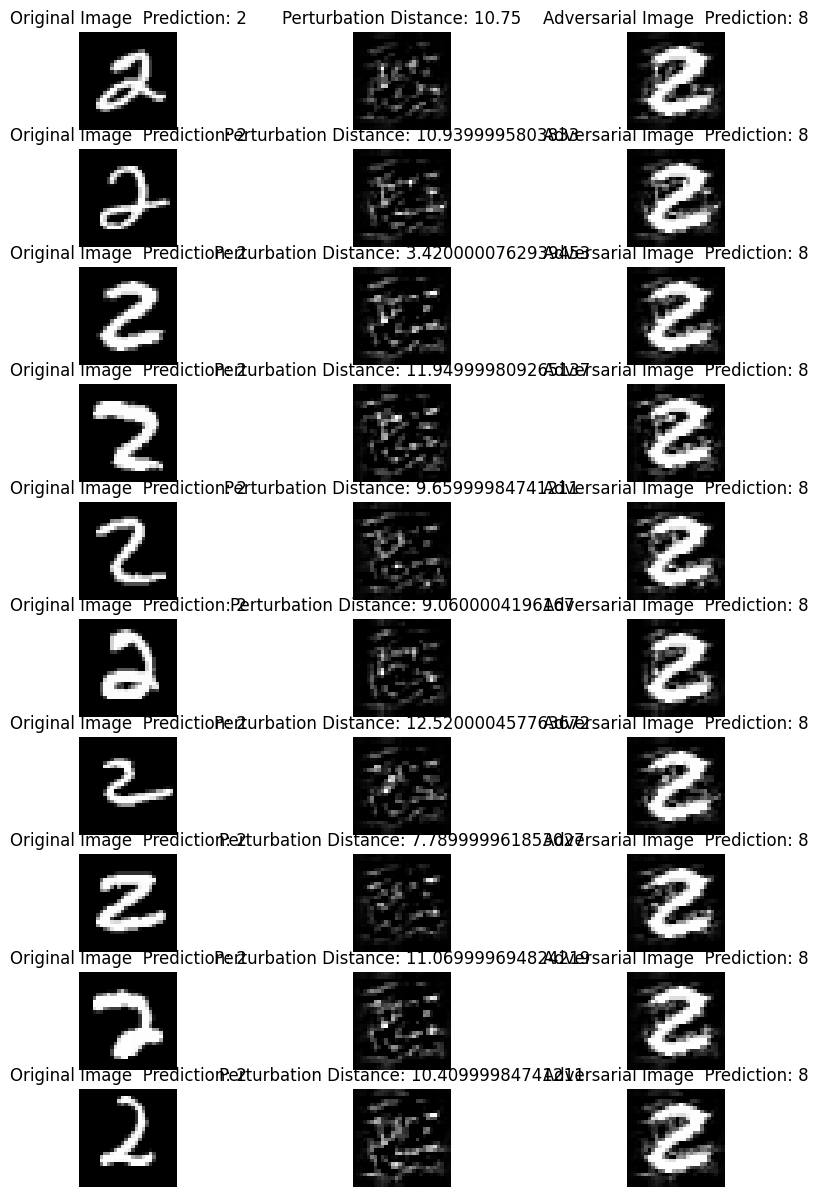

In [133]:
fig = plt.figure(figsize=(10, 15))

batch_plot_function(new_results_arr, new_org_img_arr, batch_predictions, distance_arr, fig)

In [ ]:
def deepfool_attack(image, model, num_classes=10, overshoot=0.02, max_iter=2000):
  image_tensor = np.expand_dims(image, axis=0) #tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)
  input_tensor = tf.Variable(image_tensor, dtype=tf.float32)
  # print("input_tensor", input_tensor)

  with tf.GradientTape() as tape:
    tape.watch(input_tensor)
    output = model(input_tensor) #output has the logits
    # print("output shape", output.flatten().shape)

    # print("output", output)

  f_image = tf.reshape(output, (-1,))
  # print("f_image shape", f_image)
  # print("f_image", f_image)
  num_classes = f_image.shape[0]
  # print("num classes", num_classes)
  grads = tape.gradient(output, input_tensor)
  grads = tf.squeeze(grads, axis=0)

  # print("grads", grads.shape)

  adv_image = np.copy(image)
  adv_label = np.argmax(output)
  # print("label", adv_label)


  for i in range(max_iter):
    print(f"step{i}")
    gradients = np.inf
    current_label = np.argmax(model.predict(adv_image[np.newaxis, ...])[0])
    # print("current label", current_label)

    for k in range(1, num_classes):
      w_k = grads[k] - grads[0]
      # print(f"grad_{k}", grads[k])
      f_k = f_image[k] - f_image[0]
      distance_k = abs(f_k) / np.linalg.norm(w_k)

      if distance_k < gradients:
        gradients = distance_k
        perturbation = (overshoot * w_k) / np.linalg.norm(w_k)
        # print("perturbation", perturbation)

    adv_image += perturbation

    adv_label = np.argmax(model.predict(adv_image[np.newaxis, ...])[0])


    if adv_label != current_label:
      break

  return tf.clip_by_value(adv_image, 0, 1), adv_label
